In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
#import functions as fun

In [2]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .01
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .95
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,4.5


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [3]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

In [4]:
cmap = plt.get_cmap('cmo.thermal_r',16)
cmap2 = plt.get_cmap('cmo.speed',10)
cmap2.set_under('tab:blue')
vmax = 400
vmax2 = 100

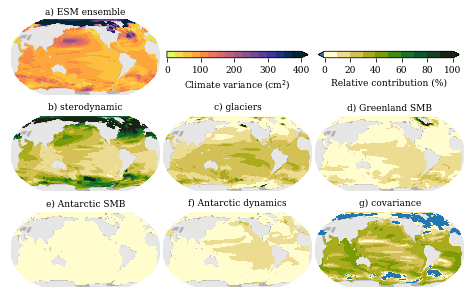

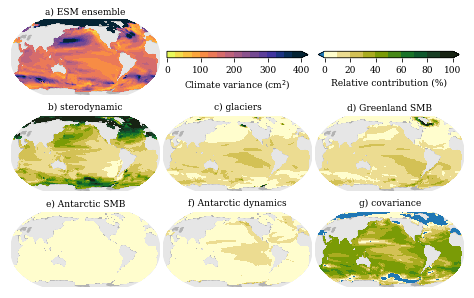

In [5]:
for s,scen in enumerate(['rcp45','rcp85']):

    fig = plt.figure()
    with xr.open_dataset(f'../data/climvar_{scen}.nc') as ds:
        lon = ds['lon'].values
        lat = ds['lat'].values
        stdn = ds['stdn'].values
        glac = ds['glac'].values
        gsmb = ds['gsmb'].values
        asmb = ds['asmb'].values
        adyn = ds['adyn'].values
        slr  = ds['slr'].values
        res  = ds['res'].values
    
    ax = fig.add_subplot(3,3,1,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,slr,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('a) ESM ensemble')
    makeglobal(ax)

    ax = fig.add_subplot(3,3,4,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*stdn/slr,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax2,cmap=cmap2)
    ax.set_title('b) sterodynamic')
    makeglobal(ax)
    
    ax = fig.add_subplot(3,3,5,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*glac/slr,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax2,cmap=cmap2)
    ax.set_title('c) glaciers')
    makeglobal(ax)
    
    ax = fig.add_subplot(3,3,6,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*gsmb/slr,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax2,cmap=cmap2)
    ax.set_title('d) Greenland SMB')
    makeglobal(ax)    
    
    ax = fig.add_subplot(3,3,7,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*asmb/slr,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax2,cmap=cmap2)
    ax.set_title('e) Antarctic SMB')
    makeglobal(ax)
    
    ax = fig.add_subplot(3,3,8,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*adyn/slr,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax2,cmap=cmap2)
    ax.set_title('f) Antarctic dynamics')
    makeglobal(ax)
    
    ax = fig.add_subplot(3,3,9,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*res/slr,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax2,cmap=cmap2)
    ax.set_title('g) covariance')
    makeglobal(ax)

    cax = fig.add_axes([.36,.75,.28,.02])
    cb = plt.colorbar(im,cax=cax,extend='max',orientation='horizontal')
    cb.set_label('Climate variance (cm$^2$)')
    cb.set_ticks([0,100,200,300,400])
    
    cax = fig.add_axes([.66,.75,.28,.02])
    cb = plt.colorbar(im2,cax=cax,extend='both',orientation='horizontal')
    cb.set_label('Relative contribution (%)')    

    figname = f'draftplot_climvar_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()